Group 12
==
---------------------
Members: 
--
Zhang Qilin, 2201212436

Xing Fangrong, 2201212427

Xin Shoushuo, 2201212243

----------------

# Contents

## Section 1: Data feature and preprocess
### 1.1 Data feature: lots of missing observations and extreme imbalanced
### 1.2 Data preprocess: fill up the missing observations and rebalance the data
##### 1.2.1 Fill up the missing values
#### 1.2.2 Rebalance the data
##### (1)  Oversampling method
##### (2) Undersampling method

## Section 2: Using machine learning model for prediction
### Section 2.1 Training the model with oversampling data
#### (1) Logistic Regression
#### (2) PCA+Logistic Regression
#### (3) Decision Tree
#### (4) PCA+Decision Tree
#### (5) Random Forest
#### (6) PCA+Random Forest
#### (7) NN
#### (8) Score card model
#### (9) Cloglog model
### Section 2.2 Training the model with undersampling data
#### (1) Logistic Regression
#### (2) PCA+Logistic Regression
#### (3) Decision Tree
#### (4) PCA+Decision Tree
#### (5) Random Forest
#### (6) PCA+Random Forest
#### (7) NN
#### (8) Score card model
#### (9) Cloglog model

## Section 3: Results display
### 3.1 Model results with oversampling
### 3.2 Model results with undersampling



Section 1: Data feature and preprocess
==

1.1 Data feature: lots of missing observations and extreme imbalanced
--

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_csv("./training.csv")
test_data = pd.read_csv("./test.csv")

In [68]:
train_data.head(5)

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,1
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,2
3,1,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.75,dev,3
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,4


In [69]:
train_data_X = train_data.iloc[:,list(range(1,9))]
train_data_X.head(5)

,var1,var2,var3,var4,var5,var6,var7,var8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.75
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
train_data_Y = train_data['event']
train_data_Y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: event, dtype: int64

In [71]:
test_data_X = test_data.iloc[:,list(range(1,9))]
test_data_X.head(5)

,var1,var2,var3,var4,var5,var6,var7,var8
0,1.0,9.248254e+07,0.908051,13.0,0.133592,0.027241,NaN,73.041667
1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,1.0,6.718715e+06,7.035461,13.0,41.878073,-7.422937,NaN,76.250000
3,1.0,3.576348e+06,0.483255,13.0,60.801780,NaN,NaN,80.083333
4,1.0,8.443072e+06,NaN,NaN,0.525225,NaN,NaN,87.625000


In [72]:
test_data_Y = test_data['event']
test_data_Y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: event, dtype: int64

In [73]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238836 entries, 0 to 238835
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   event   238836 non-null  int64  
 1   var1    133036 non-null  float64
 2   var2    117036 non-null  float64
 3   var3    46637 non-null   float64
 4   var4    78187 non-null   float64
 5   var5    8287 non-null    float64
 6   var6    5939 non-null    float64
 7   var7    27542 non-null   float64
 8   var8    101147 non-null  float64
 9   split   238836 non-null  object 
 10  id      238836 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 20.0+ MB
None


<AxesSubplot:>

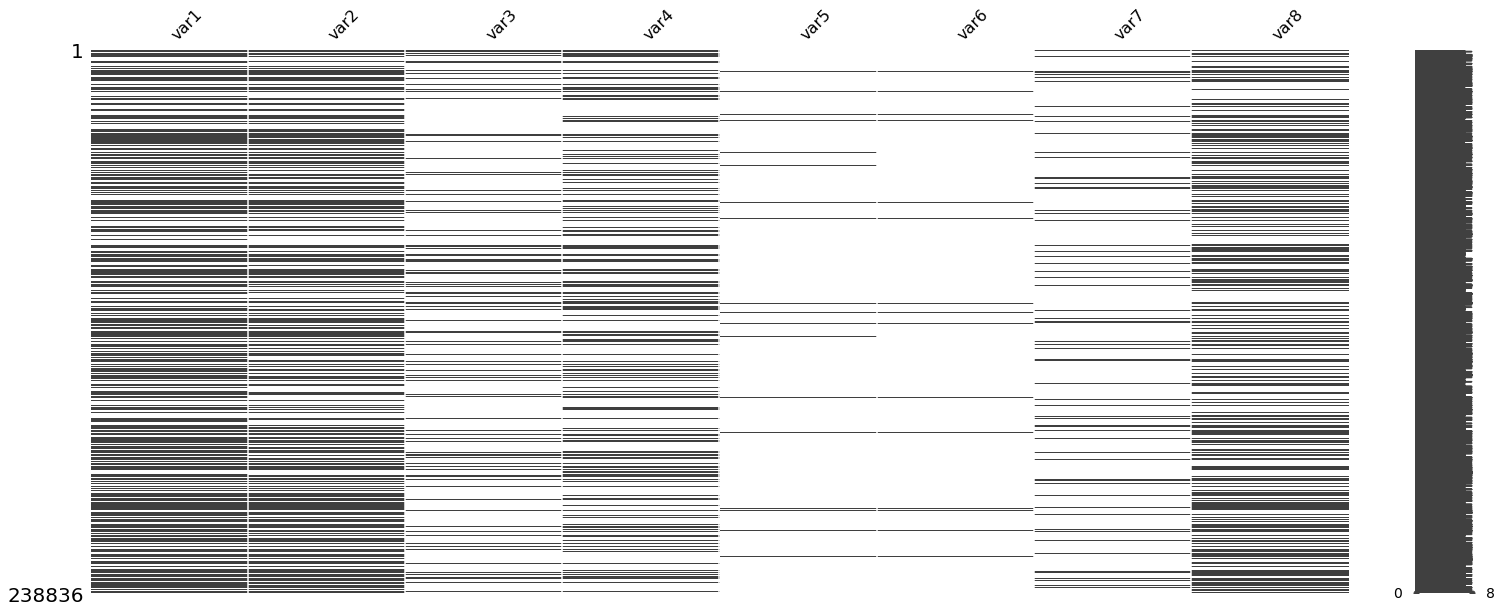

In [75]:
import missingno
import matplotlib.pyplot as plt
missingno.matrix(train_data.iloc[:,1:9])

We can find that the data is suffering from the serious observation-missing issue.

<AxesSubplot:>

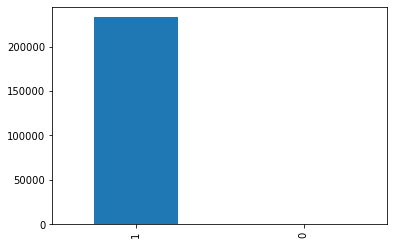

In [76]:
a = pd.cut(train_data['event'],[0,0.5,1], labels=[u"0",u"1"])
b = a.value_counts()
b.plot.bar()

We further find that the data is also suffering from extreme imbalanced issue.

1.2 Data preprocess: fill up the missing observations and rebalance the data
--

1.2.1 Fill up the missing values
---

By observing the data, we find that 

(i) var1, var4, var7 are discrete variables;

(ii) var2, var3, var5, var6, var8 are continuous variables;

So, we decide to use median to fill up the missing values of var1, var4 and var7; use mean to fill up the missing values of other columns.

In [77]:
fill_up = train_data_X.mean()
fill_up[['var1','var4','var7']] = train_data_X[['var1','var4','var7']].median()
fill_up

var1    1.000000e+00
var2    5.989773e+06
var3    1.677203e+01
var4    1.300000e+01
var5    2.891997e+02
var6    2.843049e+01
var7    2.400000e+01
var8    5.849715e+01
dtype: float64

In [78]:
train_data_X = train_data_X.fillna(value=fill_up)
test_data_X = test_data_X.fillna(value=fill_up)

Since over 80% observations of var5 and var6 are missing, we argue that it does not provide us enough information for prediction. Using Random Forest to assess the feature importance, it is clear that var5 and var6 only explain less than 1% of the difference. So, we delete var5 and var6, In other words, we will only use var1, var2, var3, var4, var7 and var8 for further prediction.

 1) var2                           0.480434
 2) var8                           0.180085
 3) var3                           0.165347
 4) var4                           0.080455
 5) var1                           0.056929
 6) var7                           0.024008
 7) var5                           0.006659
 8) var6                           0.006082


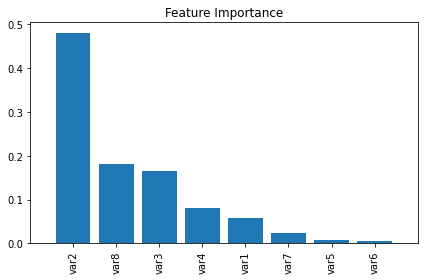

In [79]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = pd.Series(['var{}'.format(i) for i in range(1,9)])

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(train_data_X, train_data_Y)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(train_data_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(train_data_X.shape[1]), 
        importances[indices],
        align='center')
plt.xticks(range(8), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, train_data_X.shape[1]])
plt.tight_layout()

plt.show()

In [16]:
del train_data_X['var5']
del train_data_X['var6']
del test_data_X['var5']
del test_data_X['var6']

In [17]:
train_data_X.head(5)

,var1,var2,var3,var4,var7,var8
0,1.0,5.989773e+06,16.772031,13.0,24.0,58.497153
1,1.0,5.989773e+06,16.772031,13.0,24.0,58.497153
2,1.0,5.989773e+06,16.772031,13.0,24.0,58.497153
3,1.0,2.096510e+07,16.772031,13.0,24.0,62.750000
4,1.0,5.989773e+06,16.772031,13.0,24.0,58.497153


In [18]:
test_data_X.head(5)

,var1,var2,var3,var4,var7,var8
0,1.0,9.248254e+07,0.908051,13.0,24.0,73.041667
1,1.0,5.989773e+06,16.772031,4.0,24.0,58.497153
2,1.0,6.718715e+06,7.035461,13.0,24.0,76.250000
3,1.0,3.576348e+06,0.483255,13.0,24.0,80.083333
4,1.0,8.443072e+06,16.772031,13.0,24.0,87.625000


1.2.2 Rebalance the data
--

We employ oversampling method and undersampling method to rebalance the data, respectively.

(1) Oversampling method
--

In [42]:
from sklearn.utils import resample

print('Number of class 0 examples before:', train_data_X[train_data_Y == 0].shape[0])

X_upsampled, Y_upsampled = resample(train_data_X[train_data_Y == 0],
                                    train_data_Y[train_data_Y == 0],
                                    replace=True,
                                    n_samples=train_data_X[train_data_Y == 1].shape[0],
                                    random_state=123)

print('Number of class 0 examples after:', X_upsampled.shape[0])

Number of class 0 examples before: 6032
Number of class 0 examples after: 232804


In [23]:
train_data_X_bal_up = np.vstack((train_data_X[train_data_Y == 1], X_upsampled))
train_data_Y_bal_up = np.hstack((train_data_Y[train_data_Y == 1], Y_upsampled))

(2) Undersampling method
--

In [43]:
print('Number of class 1 examples before:', train_data_X[train_data_Y == 1].shape[0])

X_downsampled, Y_downsampled = resample(train_data_X[train_data_Y == 1],
                                    train_data_Y[train_data_Y == 1],
                                    replace=True,
                                    n_samples=train_data_X[train_data_Y == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_downsampled.shape[0])

Number of class 1 examples before: 232804
Number of class 1 examples after: 6032


In [25]:
train_data_X_bal_down = np.vstack((train_data_X[train_data_Y == 0], X_downsampled))
train_data_Y_bal_down = np.hstack((train_data_Y[train_data_Y == 0], Y_downsampled))

Section 2: Using machine learning model for prediction
==

Section 2.1 Training the model with oversampling data
--

(1) Logistic Regression
--

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [206]:
pipe_lr_o = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__penalty': ['l1'], 
               'logisticregression__C': param_range,
               'logisticregression__solver':['liblinear']},
              {'logisticregression__penalty': ['l2'], 
               'logisticregression__C': param_range,
               'logisticregression__solver':['lbfgs']}]

gs_LR_up = GridSearchCV(estimator=pipe_lr_o, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  refit=True,
                  cv=10,
                  n_jobs =-1)

gs_LR_up = gs_LR_up.fit(train_data_X_bal_up, train_data_Y_bal_up)

In [207]:
print(gs_LR_up.best_score_)
print(gs_LR_up.best_params_)

0.6949566850682953
{'logisticregression__C': 0.0001, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


In [208]:
LR_up_best = gs_LR_up.best_estimator_

In [209]:
import warnings
warnings.filterwarnings("ignore")
Y_pred_LR_up_best = LR_up_best.predict(test_data_X)

In [210]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
print('Accuracy: %.3f' % LR_up_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_LR_up_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_LR_up_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_LR_up_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_LR_up_best))

Accuracy: 0.930
Precision: 0.979
Recall: 0.948
F1: 0.964
Auc: 0.586


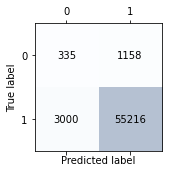

In [211]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_LR_up_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [107]:
outcome_oversample=pd.DataFrame()
outcome_oversample['Logistic Regression']=[0.930,0.979,0.948,0.964,0.586]
outcome_oversample.index = ['Accuracy', 'Precision', 'Recall', 'F1', 'Auc']
outcome_oversample

,Logistic Regression
Accuracy,0.930
Precision,0.979
Recall,0.948
F1,0.964
Auc,0.586


(2) PCA + Logistic Regression
--

In [212]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(),
                        LogisticRegression(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

n_components=[2,3,4,5,6]

param_grid = [{'logisticregression__penalty': ['l1'], 
               'logisticregression__C': param_range,
               'logisticregression__solver':['liblinear'],
               'pca__n_components':n_components},
              {'logisticregression__penalty': ['l2'], 
               'logisticregression__C': param_range,
               'logisticregression__solver':['lbfgs'],
               'pca__n_components':n_components}]

gs_PCA_LR_up = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  refit=True,
                  cv=10,
                  n_jobs =-1)

gs_PCA_LR_up = gs_PCA_LR_up.fit(train_data_X_bal_up, train_data_Y_bal_up)

In [213]:
print(gs_PCA_LR_up.best_score_)
print(gs_PCA_LR_up.best_params_)

0.6818598329266263
{'logisticregression__C': 0.0001, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'pca__n_components': 6}


In [214]:
PCA_LR_up_best = gs_PCA_LR_up.best_estimator_

In [215]:
warnings.filterwarnings("ignore")
Y_pred_PCA_LR_up_best = PCA_LR_up_best.predict(test_data_X)

In [216]:
print('Accuracy: %.3f' % PCA_LR_up_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_PCA_LR_up_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_PCA_LR_up_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_PCA_LR_up_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_PCA_LR_up_best))

Accuracy: 0.885
Precision: 0.980
Recall: 0.900
F1: 0.938
Auc: 0.589


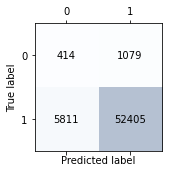

In [217]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_PCA_LR_up_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [108]:

outcome_oversample['PCA + Logistic Regression']=[0.885,0.980,0.900,0.938,0.589]
outcome_oversample

,Logistic Regression,PCA + Logistic Regression
Accuracy,0.930,0.885
Precision,0.979,0.980
Recall,0.948,0.900
F1,0.964,0.938
Auc,0.586,0.589


(3) Decision Tree
--

In [218]:
from sklearn.tree import DecisionTreeClassifier

pipe_tree_o = make_pipeline(StandardScaler(),
                 DecisionTreeClassifier(random_state=0,criterion='gini'))

param_grid=[{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None]}]

gs_DT_up = GridSearchCV(estimator=pipe_tree_o,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=10,
                  n_jobs = -1)

gs_DT_up = gs_DT_up.fit(train_data_X_bal_up, train_data_Y_bal_up)

In [219]:
print(gs_DT_up.best_score_)
print(gs_DT_up.best_params_)

0.7188244945541546
{'decisiontreeclassifier__max_depth': None}


In [220]:
DT_up_best = gs_DT_up.best_estimator_

In [221]:
warnings.filterwarnings("ignore")
Y_pred_DT_up_best = DT_up_best.predict(test_data_X)

In [222]:
print('Accuracy: %.3f' % DT_up_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_DT_up_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_DT_up_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_DT_up_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_DT_up_best))

Accuracy: 0.563
Precision: 0.983
Recall: 0.562
F1: 0.715
Auc: 0.587


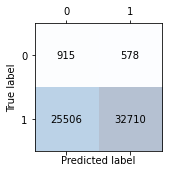

In [223]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_DT_up_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [109]:
outcome_oversample['Decision Tree']=[0.563,0.983,0.562,0.715,0.587]
outcome_oversample

,Logistic Regression,PCA + Logistic Regression,Decision Tree
Accuracy,0.930,0.885,0.563
Precision,0.979,0.980,0.983
Recall,0.948,0.900,0.562
F1,0.964,0.938,0.715
Auc,0.586,0.589,0.587


(4) PCA + Decision Tree
--

In [224]:
pipe_tree = make_pipeline(StandardScaler(),
                 PCA(),
                 DecisionTreeClassifier(random_state=0,criterion='gini'))
                 
n_components=[2,3,4,5,6]

param_grid=[{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None],
             'pca__n_components':n_components}]

gs_PCA_DT_up = GridSearchCV(estimator=pipe_tree,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=10,
                  n_jobs = -1)

gs_PCA_DT_up = gs_PCA_DT_up.fit(train_data_X_bal_up, train_data_Y_bal_up)

print(gs_PCA_DT_up.best_score_)
print(gs_PCA_DT_up.best_params_)

0.7174708833062808
{'decisiontreeclassifier__max_depth': None, 'pca__n_components': 4}


In [225]:
PCA_DT_up_best = gs_PCA_DT_up.best_estimator_

In [226]:
warnings.filterwarnings("ignore")
Y_pred_PCA_DT_up_best = PCA_DT_up_best.predict(test_data_X)

In [227]:
print('Accuracy: %.3f' % PCA_DT_up_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_PCA_DT_up_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_PCA_DT_up_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_PCA_DT_up_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_PCA_DT_up_best))

Accuracy: 0.562
Precision: 0.982
Recall: 0.561
F1: 0.714
Auc: 0.583


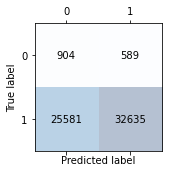

In [228]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_PCA_DT_up_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [110]:
outcome_oversample['PCA+Decision Tree']=[0.562,0.982,0.561,0.714,0.583]
outcome_oversample

,Logistic Regression,PCA + Logistic Regression,Decision Tree,PCA+Decision Tree
Accuracy,0.930,0.885,0.563,0.562
Precision,0.979,0.980,0.983,0.982
Recall,0.948,0.900,0.562,0.561
F1,0.964,0.938,0.715,0.714
Auc,0.586,0.589,0.587,0.583


(5) Random Forest
---

In [229]:
from sklearn.ensemble import RandomForestClassifier

pipe_forest_o = make_pipeline(StandardScaler(),
                 RandomForestClassifier(random_state=1,criterion='gini'))

param_grid=[{'randomforestclassifier__n_estimators': list(range(20,30))}]

gs_RF_up = GridSearchCV(estimator=pipe_forest_o,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=5,
                  n_jobs=-1)

gs_RF_up = gs_RF_up.fit(train_data_X_bal_up, train_data_Y_bal_up)

In [230]:
print(gs_RF_up.best_score_)
print(gs_RF_up.best_params_)

0.7211657971997193
{'randomforestclassifier__n_estimators': 27}


In [231]:
RF_up_best = gs_RF_up.best_estimator_

In [232]:
warnings.filterwarnings("ignore")
Y_pred_RF_up_best = RF_up_best.predict(test_data_X)

In [233]:
print('Accuracy: %.3f' % RF_up_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_RF_up_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_RF_up_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_RF_up_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_RF_up_best))

Accuracy: 0.567
Precision: 0.982
Recall: 0.566
F1: 0.718
Auc: 0.586


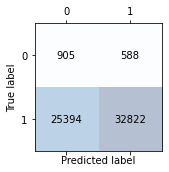

In [234]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_PCA_RF_up_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [111]:
outcome_oversample['Random Forest']=[0.567,0.982,0.566,0.718,0.586]
outcome_oversample

,Logistic Regression,PCA + Logistic Regression,Decision Tree,PCA+Decision Tree,Random Forest
Accuracy,0.930,0.885,0.563,0.562,0.567
Precision,0.979,0.980,0.983,0.982,0.982
Recall,0.948,0.900,0.562,0.561,0.566
F1,0.964,0.938,0.715,0.714,0.718
Auc,0.586,0.589,0.587,0.583,0.586


(6) PCA + Random Forest
--

In [235]:
pipe_forest = make_pipeline(StandardScaler(),
                 PCA(),
                 RandomForestClassifier(random_state=1,criterion='gini'))
                 
n_components=[2,3,4,5,6]

param_grid=[{'randomforestclassifier__n_estimators': list(range(20,30)),
             'pca__n_components':n_components}]

gs_PCA_RF_up = GridSearchCV(estimator=pipe_forest,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=5,
                  n_jobs=-1)

gs_PCA_RF_up = gs_PCA_RF_up.fit(train_data_X_bal_up, train_data_Y_bal_up)

In [236]:
print(gs_PCA_RF_up.best_score_)
print(gs_PCA_RF_up.best_params_)

0.7200809686168396
{'pca__n_components': 3, 'randomforestclassifier__n_estimators': 27}


In [237]:
PCA_RF_up_best = gs_PCA_RF_up.best_estimator_

In [238]:
warnings.filterwarnings("ignore")
Y_pred_PCA_RF_up_best = PCA_RF_up_best.predict(test_data_X)

In [239]:
print('Accuracy: %.3f' % PCA_RF_up_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_PCA_RF_up_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_PCA_RF_up_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_PCA_RF_up_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_PCA_RF_up_best))

Accuracy: 0.565
Precision: 0.982
Recall: 0.564
F1: 0.717
Auc: 0.585


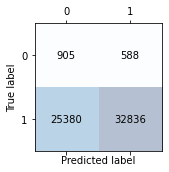

In [240]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_PCA_RF_up_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [112]:
outcome_oversample['PCA+Random Forest']=[0.565,0.982,0.564,0.717,0.585]
outcome_oversample

,Logistic Regression,PCA + Logistic Regression,Decision Tree,PCA+Decision Tree,Random Forest,PCA+Random Forest
Accuracy,0.930,0.885,0.563,0.562,0.567,0.565
Precision,0.979,0.980,0.983,0.982,0.982,0.982
Recall,0.948,0.900,0.562,0.561,0.566,0.564
F1,0.964,0.938,0.715,0.714,0.718,0.717
Auc,0.586,0.589,0.587,0.583,0.586,0.585


(7) NN
--

In [29]:
from sklearn import neural_network

pipe_nn = make_pipeline(StandardScaler(),
                        neural_network.MLPClassifier(learning_rate='adaptive', warm_start=True))

#param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'mlpclassifier__activation':['identity', 'logistic', 'tanh', 'relu']}]

gs_nn_up = GridSearchCV(estimator=pipe_nn, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  refit=True,
                  cv=10,
                  n_jobs =-1)

gs_nn_up = gs_nn_up.fit(train_data_X_bal_up, train_data_Y_bal_up)

In [30]:
print(gs_nn_up.best_score_)
print(gs_nn_up.best_params_)

0.6700472801645578
{'mlpclassifier__activation': 'identity'}


In [31]:
nn_up_best = gs_nn_up.best_estimator_

In [33]:
#warnings.filterwarnings("ignore")
Y_pred_nn_up_best = nn_up_best.predict(test_data_X)

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
print('Accuracy: %.3f' % nn_up_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_nn_up_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_nn_up_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_nn_up_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_nn_up_best))

Accuracy: 0.849
Precision: 0.979
Recall: 0.863
F1: 0.917
Auc: 0.578


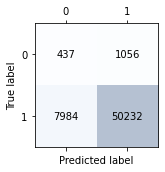

In [35]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_nn_up_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [113]:
outcome_oversample['NN']=[0.849,0.979,0.863,0.917,0.578]
outcome_oversample

,Logistic Regression,PCA + Logistic Regression,Decision Tree,PCA+Decision Tree,Random Forest,PCA+Random Forest,NN
Accuracy,0.930,0.885,0.563,0.562,0.567,0.565,0.849
Precision,0.979,0.980,0.983,0.982,0.982,0.982,0.979
Recall,0.948,0.900,0.562,0.561,0.566,0.564,0.863
F1,0.964,0.938,0.715,0.714,0.718,0.717,0.917
Auc,0.586,0.589,0.587,0.583,0.586,0.585,0.578


# (8) Score card model


In [16]:
null_count = train_data.isnull().sum(axis=1)
data= train_data[null_count <= 6]
from sklearn.model_selection import train_test_split
X, y = data.iloc[:, [1,2,3,4,7,8]].values, data.iloc[:, 0].values
data = data.fillna(-1)

In [17]:
#binning
import warnings
warnings.filterwarnings('ignore')
bins_var1 = [-np.inf, -1, 20, 40, 60, np.inf]
data['var1_group'] = pd.cut(data['var1'], bins=bins_var1, labels=False)
bins_var2 = [-np.inf,-1, 6134, 189900, 1010800, 3683678, np.inf]
data['var2_group'] = pd.cut(data['var2'], bins=bins_var2, labels=False)
bin_var3=[-np.inf, -1, 1.04, 3.46, np.inf]
data['var3_group'] = pd.cut(data['var3'], bins=bin_var3, labels=False, duplicates='drop')
data['var4_group'] = pd.factorize(data['var4'])[0]
data['var7_group'] = pd.factorize(data['var7'])[0]
bin_var8=[-np.inf, -1, 40,60, 80, np.inf]
data['var8_group'] = pd.cut(data['var8'], bins=bin_var8, labels=False, duplicates='drop')

In [19]:
#WOE coding
#var1
cut_group_all=data['event'].groupby(data['var1_group']).count()
cut_group_nonde=data['event'].groupby(data['var1_group']).sum()
cut_group_de=cut_group_all-cut_group_nonde
df_var1=pd.DataFrame()
df_var1['all']=cut_group_all
df_var1['good_sample']=cut_group_nonde
df_var1['bad_sample']=cut_group_de
df_var1['proportion_good']=df_var1['good_sample']/df_var1['good_sample'].sum()
df_var1['proportion_bad']=df_var1['bad_sample']/df_var1['bad_sample'].sum()
df_var1['woe']=np.log(df_var1['proportion_bad']/df_var1['proportion_good'])
#var2
cut_group_all=data['event'].groupby(data['var2_group']).count()
cut_group_nonde=data['event'].groupby(data['var2_group']).sum()
cut_group_de=cut_group_all-cut_group_nonde
df_var2=pd.DataFrame()
df_var2['all']=cut_group_all
df_var2['good_sample']=cut_group_nonde
df_var2['bad_sample']=cut_group_de
df_var2['proportion_good']=df_var2['good_sample']/df_var2['good_sample'].sum()
df_var2['proportion_bad']=df_var2['bad_sample']/df_var2['bad_sample'].sum()
df_var2['woe']=np.log(df_var2['proportion_bad']/df_var2['proportion_good'])
#var3
cut_group_all=data['event'].groupby(data['var3_group']).count()
cut_group_nonde=data['event'].groupby(data['var3_group']).sum()
cut_group_de=cut_group_all-cut_group_nonde
df_var3=pd.DataFrame()
df_var3['all']=cut_group_all
df_var3['good_sample']=cut_group_nonde
df_var3['bad_sample']=cut_group_de
df_var3['proportion_good']=df_var3['good_sample']/df_var3['good_sample'].sum()
df_var3['proportion_bad']=df_var3['bad_sample']/df_var3['bad_sample'].sum()
df_var3['woe']=np.log(df_var3['proportion_bad']/df_var3['proportion_good'])
#var4
cut_group_all=data['event'].groupby(data['var4_group']).count()
cut_group_nonde=data['event'].groupby(data['var4_group']).sum()
cut_group_de=cut_group_all-cut_group_nonde
df_var4=pd.DataFrame()
df_var4['all']=cut_group_all
df_var4['good_sample']=cut_group_nonde
df_var4['bad_sample']=cut_group_de
df_var4['proportion_good']=df_var4['good_sample']/df_var4['good_sample'].sum()
df_var4['proportion_bad']=df_var4['bad_sample']/df_var4['bad_sample'].sum()
df_var4['woe']=np.log(df_var4['proportion_bad']/df_var4['proportion_good'])
#var7
cut_group_all=data['event'].groupby(data['var7_group']).count()
cut_group_nonde=data['event'].groupby(data['var7_group']).sum()
cut_group_de=cut_group_all-cut_group_nonde
df_var7=pd.DataFrame()
df_var7['all']=cut_group_all
df_var7['good_sample']=cut_group_nonde
df_var7['bad_sample']=cut_group_de
df_var7['proportion_good']=df_var7['good_sample']/df_var7['good_sample'].sum()
df_var7['proportion_bad']=df_var7['bad_sample']/df_var7['bad_sample'].sum()
df_var7['woe']=np.log(df_var7['proportion_bad']/df_var7['proportion_good'])
#var8
cut_group_all=data['event'].groupby(data['var8_group']).count()
cut_group_nonde=data['event'].groupby(data['var8_group']).sum()
cut_group_de=cut_group_all-cut_group_nonde
df_var8=pd.DataFrame()
df_var8['all']=cut_group_all
df_var8['good_sample']=cut_group_nonde
df_var8['bad_sample']=cut_group_de
df_var8['proportion_good']=df_var8['good_sample']/df_var8['good_sample'].sum()
df_var8['proportion_bad']=df_var8['bad_sample']/df_var8['bad_sample'].sum()
df_var8['woe']=np.log(df_var8['proportion_bad']/df_var8['proportion_good'])
#WOE coding
data1=pd.DataFrame()
data1['var1']=data['var1_group']
data1['var2']=data['var2_group']
data1['var3']=data['var3_group']
data1['var4']=data['var4_group']
data1['var7']=data['var7_group']
data1['var8']=data['var8_group']
for index, row in data1.iterrows():
    if row['var1'] == 0:
        data1.loc[index, 'var1'] = df_var1.iloc[0, 5]
    elif row['var1'] == 1:
        data1.loc[index, 'var1'] = df_var1.iloc[1, 5]
    elif row['var1'] == 2:
        data1.loc[index, 'var1'] = df_var1.iloc[2, 5]
    elif row['var1'] == 3:
        data1.loc[index, 'var1'] = df_var1.iloc[3, 5]
    elif row['var1'] == 4:
        data1.loc[index, 'var1'] = df_var1.iloc[4, 5]
    elif row['var1'] == 5:
        data1.loc[index, 'var1'] = df_var1.iloc[5, 5]
    if row['var2'] == 0:
        data1.loc[index, 'var2'] = df_var2.iloc[0, 5]
    elif row['var2'] == 1:
        data1.loc[index, 'var2'] = df_var2.iloc[1, 5]
    elif row['var2'] == 2:
        data1.loc[index, 'var2'] = df_var2.iloc[2, 5]
    elif row['var2'] == 3:
        data1.loc[index, 'var2'] = df_var2.iloc[3, 5]
    elif row['var2'] == 4:
        data1.loc[index, 'var2'] = df_var2.iloc[4, 5]
    elif row['var2'] == 5:
        data1.loc[index, 'var2'] = df_var2.iloc[5, 5]
    if row['var3'] == 0:
        data1.loc[index, 'var3'] = df_var3.iloc[0, 5]
    elif row['var3'] == 1:
        data1.loc[index, 'var3'] = df_var3.iloc[1, 5]
    elif row['var3'] == 2:
        data1.loc[index, 'var3'] = df_var3.iloc[2, 5]
    elif row['var3'] == 3:
        data1.loc[index, 'var3'] = df_var3.iloc[3, 5]
for index, row in data1.iterrows():
    if row['var4'] == 0:
        data1.loc[index, 'var4'] = df_var4.iloc[0, 5]
    elif row['var4'] == 1:
        data1.loc[index, 'var4'] = df_var4.iloc[1, 5]
    elif row['var4'] == 2:
        data1.loc[index, 'var4'] = df_var4.iloc[2, 5]
    elif row['var4'] == 3:
        data1.loc[index, 'var4'] = df_var4.iloc[3, 5]
    elif row['var4'] == 4:
        data1.loc[index, 'var4'] = df_var4.iloc[4, 5]
    elif row['var4'] == 5:
        data1.loc[index, 'var4'] = df_var4.iloc[5, 5]
    elif row['var4'] == 6:
        data1.loc[index, 'var4'] = df_var4.iloc[6, 5]
    elif row['var4'] == 7:
        data1.loc[index, 'var4'] = df_var4.iloc[7, 5]
    elif row['var4'] == 8:
        data1.loc[index, 'var4'] = df_var4.iloc[8, 5]
    elif row['var4'] == 9:
        data1.loc[index, 'var4'] = df_var4.iloc[9, 5]
    elif row['var4'] == 10:
        data1.loc[index, 'var4'] = df_var4.iloc[10, 5]
    elif row['var4'] == 11:
        data1.loc[index, 'var4'] = df_var4.iloc[11, 5]
    elif row['var4'] == 12:
        data1.loc[index, 'var4'] = df_var4.iloc[12, 5]
    elif row['var4'] == 13:
        data1.loc[index, 'var4'] = df_var4.iloc[13, 5]
for index, row in data1.iterrows():
    if row['var7'] == 0:
        data1.loc[index, 'var7'] = df_var7.iloc[0, 5]
    elif row['var7'] == 1:
        data1.loc[index, 'var7'] = df_var7.iloc[1, 5]
    elif row['var7'] == 2:
        data1.loc[index, 'var7'] = df_var7.iloc[2, 5]
    elif row['var7'] == 3:
        data1.loc[index, 'var7'] = df_var7.iloc[3, 5]
    elif row['var7'] == 4:
        data1.loc[index, 'var7'] = df_var7.iloc[4, 5]
    elif row['var7'] == 5:
        data1.loc[index, 'var7'] = df_var7.iloc[5, 5]
    elif row['var7'] == 6:
        data1.loc[index, 'var7'] = df_var7.iloc[6, 5]
    elif row['var7'] == 7:
        data1.loc[index, 'var7'] = df_var7.iloc[7, 5]
    elif row['var7'] == 8:
        data1.loc[index, 'var7'] = df_var7.iloc[8, 5]
    elif row['var7'] == 9:
        data1.loc[index, 'var7'] = df_var7.iloc[9, 5]
    elif row['var7'] == 10:
        data1.loc[index, 'var7'] = df_var7.iloc[10, 5]
    elif row['var7'] == 11:
        data1.loc[index, 'var7'] = df_var7.iloc[11, 5]
    elif row['var7'] == 12:
        data1.loc[index, 'var7'] = df_var7.iloc[12, 5]
    elif row['var7'] == 13:
        data1.loc[index, 'var7'] = df_var7.iloc[13, 5]
    elif row['var7'] == 14:
        data1.loc[index, 'var7'] = df_var7.iloc[14, 5]
    elif row['var7'] == 15:
        data1.loc[index, 'var7'] = df_var7.iloc[15, 5]
    elif row['var7'] == 16:
        data1.loc[index, 'var7'] = df_var7.iloc[16, 5]
    elif row['var7'] == 17:
        data1.loc[index, 'var7'] = df_var7.iloc[17, 5]
    elif row['var7'] == 18:
        data1.loc[index, 'var7'] = df_var7.iloc[18, 5]
    elif row['var7'] == 19:
        data1.loc[index, 'var7'] = df_var7.iloc[19, 5]
    elif row['var7'] == 20:
        data1.loc[index, 'var7'] = df_var7.iloc[20, 5]
    elif row['var7'] == 21:
        data1.loc[index, 'var7'] = df_var7.iloc[21, 5]
    elif row['var7'] == 22:
        data1.loc[index, 'var7'] = df_var7.iloc[22, 5]
    elif row['var7'] == 23:
        data1.loc[index, 'var7'] = df_var7.iloc[23, 5]
for index, row in data1.iterrows():
    if row['var8'] == 0:
        data1.loc[index, 'var8'] = df_var8.iloc[0, 5]
    elif row['var8'] == 1:
        data1.loc[index, 'var8'] = df_var8.iloc[1, 5]
    elif row['var8'] == 2:
        data1.loc[index, 'var8'] = df_var8.iloc[2, 5]
    elif row['var8'] == 3:
        data1.loc[index, 'var8'] = df_var8.iloc[3, 5]
    elif row['var8'] == 4:
        data1.loc[index, 'var8'] = df_var8.iloc[4, 5]
data1['event']=data['event']
data1

,var1,var2,var3,var4,var7,var8,event
3,-0.001416,-1.164968,-0.012546,-0.195742,-0.063663,-0.622652,1
6,-0.001416,-0.738206,-0.012546,-0.195742,-0.063663,-0.622652,1
8,-0.001416,-0.738206,-0.012546,-0.195742,-0.063663,-0.622652,1
9,-0.001416,1.100750,-0.012546,-0.778804,-0.063663,0.361676,1
11,-0.001416,-1.164968,-0.674988,-0.778804,-0.063663,0.025446,1
...,...,...,...,...,...,...,...
238823,-0.001416,0.163199,-0.012546,-0.195742,-0.063663,-0.622652,1
238825,-0.001416,1.100750,0.693204,-0.778804,-0.063663,0.361676,1
238828,-0.001416,0.443760,-1.439057,-0.778804,-0.063663,0.361676,1
238831,-0.001416,0.443760,-0.012546,-0.195742,-0.063663,0.025446,1


In [24]:
#traing model with logistic regression
from sklearn.model_selection import train_test_split
X_train, y_train = data2.iloc[:, [0,1,2,3,4,5]].values, data2.iloc[:,6].values
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros=RandomOverSampler(random_state=123)
X_oversampled,y_oversampled=ros.fit_resample(X_train,y_train)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_oversampled,y_oversampled)

LogisticRegression(multi_class='ovr', random_state=1)

In [22]:
#Handling the test set
test_data =test_data.fillna(-1)
bins_var1 = [-np.inf, -1, 20, 40, 60, 80, np.inf]
test_data['var1_group'] = pd.cut(test_data['var1'], bins=bins_var1, labels=False)

bins_var2 = [-np.inf, -1, 6134, 189900, 1010800, 3683678, np.inf]
test_data['var2_group'] = pd.cut(test_data['var2'], bins=bins_var2, labels=False)

bin_var3=[-np.inf, -1, 1.04, 3.46, np.inf]
test_data['var3_group'] = pd.cut(test_data['var3'], bins=bin_var3, labels=False)

test_data['var4_group'] = pd.factorize(test_data['var4'])[0]

test_data['var7_group'] = pd.factorize(test_data['var7'])[0]

bin_var8=[-np.inf, -1, 40,  80, np.inf]
test_data['var8_group'] = pd.cut(test_data['var8'], bins=bin_var8, labels=False)

data2=pd.DataFrame()
data2['var1']=test_data['var1_group']
data2['var2']=test_data['var2_group']
data2['var3']=test_data['var3_group']
data2['var4']=test_data['var4_group']
data2['var7']=test_data['var7_group']
data2['var8']=test_data['var8_group']
for index, row in data2.iterrows():
    if row['var1'] == 0:
        data2.loc[index, 'var1'] = df_var1.iloc[0, 5]
    elif row['var1'] == 1:
        data2.loc[index, 'var1'] = df_var1.iloc[1, 5]
    elif row['var1'] == 2:
        data2.loc[index, 'var1'] = df_var1.iloc[2, 5]
    elif row['var1'] == 3:
        data2.loc[index, 'var1'] = df_var1.iloc[3, 5]
    elif row['var1'] == 4:
        data2.loc[index, 'var1'] = df_var1.iloc[4, 5]
    if row['var2'] == 0:
        data2.loc[index, 'var2'] = df_var2.iloc[0, 5]
    elif row['var2'] == 1:
        data2.loc[index, 'var2'] = df_var2.iloc[1, 5]
    elif row['var2'] == 2:
        data2.loc[index, 'var2'] = df_var2.iloc[2, 5]
    elif row['var2'] == 3:
        data2.loc[index, 'var2'] = df_var2.iloc[3, 5]
    elif row['var2'] == 4:
        data2.loc[index, 'var2'] = df_var2.iloc[4, 5]
    elif row['var2'] == 5:
        data2.loc[index, 'var2'] = df_var2.iloc[5, 5]    
    if row['var3'] == 0:
        data2.loc[index, 'var3'] = df_var3.iloc[0, 5]
    elif row['var3'] == 1:
        data2.loc[index, 'var3'] = df_var3.iloc[1, 5]
    elif row['var3'] == 2:
        data2.loc[index, 'var3'] = df_var3.iloc[2, 5]
    elif row['var3'] == 3:
        data2.loc[index, 'var3'] = df_var3.iloc[3, 5]
for index, row in data2.iterrows():
    if row['var4'] == 0:
        data2.loc[index, 'var4'] = df_var4.iloc[0, 5]
    elif row['var4'] == 1:
        data2.loc[index, 'var4'] = df_var4.iloc[1, 5]
    elif row['var4'] == 2:
        data2.loc[index, 'var4'] = df_var4.iloc[2, 5]
    elif row['var4'] == 3:
        data2.loc[index, 'var4'] = df_var4.iloc[3, 5]
    elif row['var4'] == 4:
        data2.loc[index, 'var4'] = df_var4.iloc[4, 5]
    elif row['var4'] == 5:
        data2.loc[index, 'var4'] = df_var4.iloc[5, 5]
    elif row['var4'] == 6:
        data2.loc[index, 'var4'] = df_var4.iloc[6, 5]
    elif row['var4'] == 7:
        data2.loc[index, 'var4'] = df_var4.iloc[7, 5]
    elif row['var4'] == 8:
        data2.loc[index, 'var4'] = df_var4.iloc[8, 5]
    elif row['var4'] == 9:
        data2.loc[index, 'var4'] = df_var4.iloc[9, 5]
    elif row['var4'] == 10:
        data2.loc[index, 'var4'] = df_var4.iloc[10, 5]
    elif row['var4'] == 11:
        data2.loc[index, 'var4'] = df_var4.iloc[11, 5]
    elif row['var4'] == 12:
        data2.loc[index, 'var4'] = df_var4.iloc[12, 5]
    elif row['var4'] == 13:
        data2.loc[index, 'var4'] = df_var4.iloc[13, 5]
for index, row in data2.iterrows():
    if row['var7'] == 0:
        data2.loc[index, 'var7'] = df_var7.iloc[0, 5]
    elif row['var7'] == 1:
        data2.loc[index, 'var7'] = df_var7.iloc[1, 5]
    elif row['var7'] == 2:
        data2.loc[index, 'var7'] = df_var7.iloc[2, 5]
    elif row['var7'] == 3:
        data2.loc[index, 'var7'] = df_var7.iloc[3, 5]
    elif row['var7'] == 4:
        data2.loc[index, 'var7'] = df_var7.iloc[4, 5]
    elif row['var7'] == 5:
        data2.loc[index, 'var7'] = df_var7.iloc[5, 5]
    elif row['var7'] == 6:
        data2.loc[index, 'var7'] = df_var7.iloc[6, 5]
    elif row['var7'] == 7:
        data2.loc[index, 'var7'] = df_var7.iloc[7, 5]
    elif row['var7'] == 8:
        data2.loc[index, 'var7'] = df_var7.iloc[8, 5]
    elif row['var7'] == 9:
        data2.loc[index, 'var7'] = df_var7.iloc[9, 5]
    elif row['var7'] == 10:
        data2.loc[index, 'var7'] = df_var7.iloc[10, 5]
    elif row['var7'] == 11:
        data2.loc[index, 'var7'] = df_var7.iloc[11, 5]
    elif row['var7'] == 12:
        data2.loc[index, 'var7'] = df_var7.iloc[12, 5]
    elif row['var7'] == 13:
        data2.loc[index, 'var7'] = df_var7.iloc[13, 5]
    elif row['var7'] == 14:
        data2.loc[index, 'var7'] = df_var7.iloc[14, 5]
    elif row['var7'] == 15:
        data2.loc[index, 'var7'] = df_var7.iloc[15, 5]
    elif row['var7'] == 16:
        data2.loc[index, 'var7'] = df_var7.iloc[16, 5]
    elif row['var7'] == 17:
        data2.loc[index, 'var7'] = df_var7.iloc[17, 5]
    elif row['var7'] == 18:
        data2.loc[index, 'var7'] = df_var7.iloc[18, 5]
    elif row['var7'] == 19:
        data2.loc[index, 'var7'] = df_var7.iloc[19, 5]
    elif row['var7'] == 20:
        data2.loc[index, 'var7'] = df_var7.iloc[20, 5]
    elif row['var7'] == 21:
        data2.loc[index, 'var7'] = df_var7.iloc[21, 5]
    elif row['var7'] == 22:
        data2.loc[index, 'var7'] = df_var7.iloc[22, 5]
    elif row['var7'] == 23:
        data2.loc[index, 'var7'] = df_var7.iloc[23, 5]
for index, row in data2.iterrows():
    if row['var8'] == 0:
        data2.loc[index, 'var8'] = df_var8.iloc[0, 5]
    elif row['var8'] == 1:
        data2.loc[index, 'var8'] = df_var8.iloc[1, 5]
    elif row['var8'] == 2:
        data2.loc[index, 'var8'] = df_var8.iloc[2, 5]
    elif row['var8'] == 3:
        data2.loc[index, 'var8'] = df_var8.iloc[3, 5]
    elif row['var8'] == 4:
        data2.loc[index, 'var8'] = df_var8.iloc[4, 5]
data2['event']=test_data['event']
data2

,var1,var2,var3,var4,var7,var8,event
0,-0.001416,-1.164968,0.693204,-0.195742,-0.063663,0.025446,1
1,-0.610789,0.163199,-0.012546,-0.778804,-0.063663,0.361676,1
2,-0.001416,-1.164968,-1.439057,-0.195742,-0.063663,0.025446,1
3,-0.001416,-0.738206,0.693204,-0.195742,-0.063663,-0.622652,1
4,-0.001416,-1.164968,-0.012546,0.176743,-0.063663,-0.622652,1
...,...,...,...,...,...,...,...
59704,-0.001416,-0.738206,-0.012546,0.176743,-0.063663,0.361676,1
59705,-0.610789,0.163199,-0.012546,0.176743,-0.063663,0.361676,1
59706,-0.001416,-1.164968,-0.012546,0.176743,-0.063663,0.361676,1
59707,-0.610789,0.163199,-0.012546,0.176743,-0.063663,0.361676,1


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score , roc_auc_score

X_test, y_test = data2.iloc[:, [0,1,2,3,4,5]].values, data2.iloc[:, 6].values
y_pred =lr.predict(X_train)
print('Accuracy: %.3f' % lr.score(X_test, y_test))

precision = precision_score(y_pred, y_test)
print('precision: %.3f' % precision)

recall = recall_score(y_pred, y_test)
print('recall: %.3f' % recall)

f1 = f1_score(y_pred, y_test)
print('F1: %.3f' % f1)

y_pred_proba = lr.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("Auc: {:.2f}".format(auc))



Accuracy: 0.499
precision: 0.490
recall: 0.990
F1: 0.656
Auc: 0.71


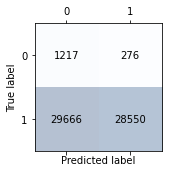

In [33]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [114]:
outcome_oversample['Score card model']=[0.499,0.490,0.990,0.656,0.71]
outcome_oversample

,Logistic Regression,PCA + Logistic Regression,Decision Tree,PCA+Decision Tree,Random Forest,PCA+Random Forest,NN,Score card model
Accuracy,0.930,0.885,0.563,0.562,0.567,0.565,0.849,0.499
Precision,0.979,0.980,0.983,0.982,0.982,0.982,0.979,0.490
Recall,0.948,0.900,0.562,0.561,0.566,0.564,0.863,0.990
F1,0.964,0.938,0.715,0.714,0.718,0.717,0.917,0.656
Auc,0.586,0.589,0.587,0.583,0.586,0.585,0.578,0.710


# (9) Cloglog model

In [89]:
import statsmodels.api as sm
ros=RandomOverSampler(random_state=123)
X_oversampled,Y_oversampled=ros.fit_resample(train_data_X,train_data_Y)    
model = sm.GLM(Y_oversampled, sm.add_constant(X_oversampled), family=sm.families.Binomial(link=sm.families.links.cloglog()))
result = model.fit()

print(result.summary())


y_pred = result.predict(sm.add_constant(test_data_X))
y_pred = [1 if val > 0.5 else 0 for val in y_pred]

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  event   No. Observations:               465608
Model:                            GLM   Df Residuals:                   465599
Model Family:                Binomial   Df Model:                            8
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.0319e+05
Date:                Sun, 30 Apr 2023   Deviance:                   6.0639e+05
Time:                        17:52:50   Pearson chi2:                 4.65e+05
No. Iterations:                    17   Pseudo R-squ. (CS):            0.08051
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8647      0.030    -94.718      0.0

In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print('precision: %.3f' % precision)

recall = recall_score(y_test, y_pred)
print('recall: %.3f' % recall)

f1 = f1_score(y_test, y_pred)
print('F1: %.3f' % f1)



Accuracy: 0.8334086988561188
precision: 0.979
recall: 0.847
F1: 0.908


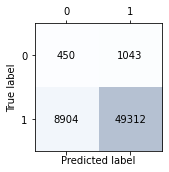

In [92]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [121]:
outcome_oversample['Cloglog model']=[0.833,0.979,0.847,0.908,None]
outcome_oversample

,Logistic Regression,PCA + Logistic Regression,Decision Tree,PCA+Decision Tree,Random Forest,PCA+Random Forest,NN,Score card model,Cloglog model
Accuracy,0.930,0.885,0.563,0.562,0.567,0.565,0.849,0.499,0.833
Precision,0.979,0.980,0.983,0.982,0.982,0.982,0.979,0.490,0.979
Recall,0.948,0.900,0.562,0.561,0.566,0.564,0.863,0.990,0.847
F1,0.964,0.938,0.715,0.714,0.718,0.717,0.917,0.656,0.908
Auc,0.586,0.589,0.587,0.583,0.586,0.585,0.578,0.710,NaN


Section 2.2 Training the model with undersampling data
--

(1) Logistic Regression
--

In [187]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__penalty': ['l1'], 
               'logisticregression__C': param_range,
               'logisticregression__solver':['liblinear']},
              {'logisticregression__penalty': ['l2'], 
               'logisticregression__C': param_range,
               'logisticregression__solver':['lbfgs']}]

gs_LR_down = GridSearchCV(estimator=pipe_lr_o, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  refit=True,
                  cv=10,
                  n_jobs =-1)

gs_LR_down = gs_LR_down.fit(train_data_X_bal_down, train_data_Y_bal_down)

In [188]:
print(gs_LR_down.best_score_)
print(gs_LR_down.best_params_)

0.6954503054487668
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


In [189]:
LR_down_best = gs_LR_down.best_estimator_

In [190]:
warnings.filterwarnings("ignore")
Y_pred_LR_down_best = LR_down_best.predict(test_data_X)

In [191]:
print('Accuracy: %.3f' % LR_down_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_LR_down_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_LR_down_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_LR_down_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_LR_down_best))

Accuracy: 0.933
Precision: 0.979
Recall: 0.952
F1: 0.965
Auc: 0.583


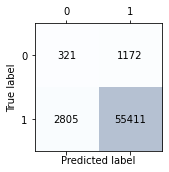

In [192]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_LR_down_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [125]:
outcome_undersample=pd.DataFrame()
outcome_undersample['Logistic Regression']=[0.933,0.979,0.952,0.965,0.583]
outcome_undersample.index = ['Accuracy', 'Precision', 'Recall', 'F1', 'Auc']
outcome_undersample

,Logistic Regression
Accuracy,0.933
Precision,0.979
Recall,0.952
F1,0.965
Auc,0.583


(2) PCA + Logistic Regression
--

In [181]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

n_components=[2,3,4,5,6]

param_grid = [{'logisticregression__penalty': ['l1'], 
               'logisticregression__C': param_range,
               'logisticregression__solver':['liblinear'],
               'pca__n_components':n_components},
              {'logisticregression__penalty': ['l2'], 
               'logisticregression__C': param_range,
               'logisticregression__solver':['lbfgs'],
               'pca__n_components':n_components}]

gs_PCA_LR_down = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  refit=True,
                  cv=10,
                  n_jobs =-1)

gs_PCA_LR_down = gs_PCA_LR_down.fit(train_data_X_bal_down, train_data_Y_bal_down)

In [182]:
print(gs_PCA_LR_down.best_score_)
print(gs_PCA_LR_down.best_params_)

0.6758656929612075
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'pca__n_components': 6}


In [183]:
PCA_LR_down_best = gs_PCA_LR_down.best_estimator_

In [184]:
warnings.filterwarnings("ignore")
Y_pred_PCA_LR_down_best = PCA_LR_down_best.predict(test_data_X)

In [185]:
print('Accuracy: %.3f' % PCA_LR_down_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_PCA_LR_down_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_PCA_LR_down_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_PCA_LR_down_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_PCA_LR_down_best))

Accuracy: 0.870
Precision: 0.980
Recall: 0.885
F1: 0.930
Auc: 0.582


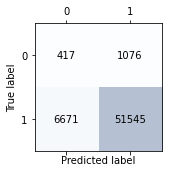

In [186]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_PCA_LR_down_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [126]:
outcome_undersample['PCA+Logistic Regression']=[0.870,0.980,0.885,0.930,0.582]
outcome_undersample.index = ['Accuracy', 'Precision', 'Recall', 'F1', 'Auc']
outcome_undersample

,Logistic Regression,PCA+Logistic Regression
Accuracy,0.933,0.870
Precision,0.979,0.980
Recall,0.952,0.885
F1,0.965,0.930
Auc,0.583,0.582


(3) Decision Tree
--

In [175]:
param_grid=[{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None]}]

gs_DT_down = GridSearchCV(estimator=pipe_tree_o,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=10,
                  n_jobs = -1)

gs_DT_down = gs_DT_down.fit(train_data_X_bal_down, train_data_Y_bal_down)

In [176]:
print(gs_DT_down.best_score_)
print(gs_DT_down.best_params_)

0.6954557317186517
{'decisiontreeclassifier__max_depth': 1}


In [177]:
DT_down_best = gs_DT_down.best_estimator_

In [178]:
warnings.filterwarnings("ignore")
Y_pred_DT_down_best = DT_down_best.predict(test_data_X)

In [179]:
print('Accuracy: %.3f' % DT_down_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_DT_down_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_DT_down_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_DT_down_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_DT_down_best))

Accuracy: 0.955
Precision: 0.979
Recall: 0.975
F1: 0.977
Auc: 0.575


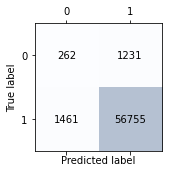

In [180]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_DT_down_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [127]:
outcome_undersample['Decision tree']=[0.955,0.979,0.975,0.977,0.575]
outcome_undersample

,Logistic Regression,PCA+Logistic Regression,Decision tree
Accuracy,0.933,0.870,0.955
Precision,0.979,0.980,0.979
Recall,0.952,0.885,0.975
F1,0.965,0.930,0.977
Auc,0.583,0.582,0.575


(4) PCA + Decision Tree
--

In [169]:
n_components=[2,3,4,5,6]

param_grid=[{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None],
             'pca__n_components':n_components}]

gs_PCA_DT_down = GridSearchCV(estimator=pipe_tree,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=10,
                  n_jobs = -1)

gs_PCA_DT_down = gs_PCA_DT_down.fit(train_data_X_bal_down, train_data_Y_bal_down)

In [170]:
print(gs_PCA_DT_down.best_score_)
print(gs_PCA_DT_down.best_params_)

0.6506437784203829
{'decisiontreeclassifier__max_depth': 2, 'pca__n_components': 2}


In [171]:
PCA_DT_down_best = gs_PCA_DT_down.best_estimator_

In [172]:
warnings.filterwarnings("ignore")
Y_pred_PCA_DT_down_best = PCA_DT_down_best.predict(test_data_X)

In [173]:
print('Accuracy: %.3f' % PCA_DT_down_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_PCA_DT_down_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_PCA_DT_down_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_PCA_DT_down_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_PCA_DT_down_best))

Accuracy: 0.913
Precision: 0.980
Recall: 0.931
F1: 0.955
Auc: 0.586


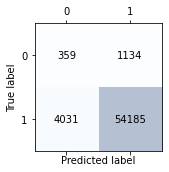

In [174]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_PCA_DT_down_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [128]:
outcome_undersample['PCA+Decision tree']=[0.913,0.980,0.931,0.955,0.586]
outcome_undersample

,Logistic Regression,PCA+Logistic Regression,Decision tree,PCA+Decision tree
Accuracy,0.933,0.870,0.955,0.913
Precision,0.979,0.980,0.979,0.980
Recall,0.952,0.885,0.975,0.931
F1,0.965,0.930,0.977,0.955
Auc,0.583,0.582,0.575,0.586


(5) Random Forest
--

In [199]:
param_grid=[{'randomforestclassifier__n_estimators': list(range(20,30))}]

gs_RF_down = GridSearchCV(estimator=pipe_forest_o,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=5,
                  n_jobs=-1)

gs_RF_down = gs_RF_down.fit(train_data_X_bal_down, train_data_Y_bal_down)

In [200]:
print(gs_PCA_RF_down.best_score_)
print(gs_PCA_RF_down.best_params_)

0.5329949336453684
{'pca__n_components': 6, 'randomforestclassifier__n_estimators': 27}


In [201]:
RF_down_best = gs_RF_down.best_estimator_

In [202]:
warnings.filterwarnings("ignore")
Y_pred_RF_down_best = RF_down_best.predict(test_data_X)

In [203]:
print('Accuracy: %.3f' % RF_down_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_RF_down_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_RF_down_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_RF_down_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_RF_down_best))

Accuracy: 0.439
Precision: 0.990
Recall: 0.428
F1: 0.598
Auc: 0.633


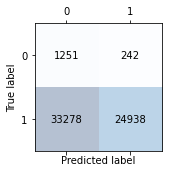

In [204]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_RF_down_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [129]:
outcome_undersample['Random Forest']=[0.439,0.990,0.428,0.598,0.633]
outcome_undersample

,Logistic Regression,PCA+Logistic Regression,Decision tree,PCA+Decision tree,Random Forest
Accuracy,0.933,0.870,0.955,0.913,0.439
Precision,0.979,0.980,0.979,0.980,0.990
Recall,0.952,0.885,0.975,0.931,0.428
F1,0.965,0.930,0.977,0.955,0.598
Auc,0.583,0.582,0.575,0.586,0.633


(6) PCA + Random Forest
--

In [193]:
n_components=[2,3,4,5,6]

param_grid=[{'randomforestclassifier__n_estimators': list(range(20,30)),
             'pca__n_components':n_components}]

gs_PCA_RF_down = GridSearchCV(estimator=pipe_forest,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=5,
                  n_jobs=-1)

gs_PCA_RF_down = gs_PCA_RF_down.fit(train_data_X_bal_down, train_data_Y_bal_down)

In [194]:
print(gs_PCA_RF_down.best_score_)
print(gs_PCA_RF_down.best_params_)

0.5329949336453684
{'pca__n_components': 6, 'randomforestclassifier__n_estimators': 27}


In [195]:
PCA_RF_down_best = gs_PCA_RF_down.best_estimator_

In [196]:
warnings.filterwarnings("ignore")
Y_pred_PCA_RF_down_best = PCA_RF_down_best.predict(test_data_X)

In [197]:
print('Accuracy: %.3f' % PCA_RF_down_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_PCA_RF_down_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_PCA_RF_down_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_PCA_RF_down_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_PCA_RF_down_best))

Accuracy: 0.434
Precision: 0.990
Recall: 0.424
F1: 0.594
Auc: 0.629


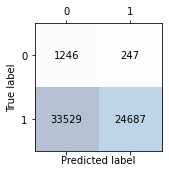

In [198]:
confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_PCA_RF_down_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [130]:
outcome_undersample['PCA+Random Forest']=[0.434,0.990,0.424,0.594,0.629]
outcome_undersample

,Logistic Regression,PCA+Logistic Regression,Decision tree,PCA+Decision tree,Random Forest,PCA+Random Forest
Accuracy,0.933,0.870,0.955,0.913,0.439,0.434
Precision,0.979,0.980,0.979,0.980,0.990,0.990
Recall,0.952,0.885,0.975,0.931,0.428,0.424
F1,0.965,0.930,0.977,0.955,0.598,0.594
Auc,0.583,0.582,0.575,0.586,0.633,0.629


(7) NN
--

In [36]:
from sklearn import neural_network

pipe_nn = make_pipeline(StandardScaler(),
                        neural_network.MLPClassifier(learning_rate='adaptive', warm_start=True))

#param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'mlpclassifier__activation':['identity', 'logistic', 'tanh', 'relu']}]

gs_nn_down = GridSearchCV(estimator=pipe_nn, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  refit=True,
                  cv=10,
                  n_jobs =-1)

gs_nn_down = gs_nn_down.fit(train_data_X_bal_down, train_data_Y_bal_down)

In [37]:
print(gs_nn_down.best_score_)
print(gs_nn_down.best_params_)

0.6647972883526774
{'mlpclassifier__activation': 'identity'}


In [38]:
nn_down_best = gs_nn_down.best_estimator_

In [39]:
Y_pred_nn_down_best = nn_down_best.predict(test_data_X)

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
print('Accuracy: %.3f' % nn_down_best.score(test_data_X, test_data_Y))
print('Precision: %.3f' % precision_score(y_true=test_data_Y, y_pred=Y_pred_nn_down_best))
print('Recall: %.3f' % recall_score(y_true=test_data_Y, y_pred=Y_pred_nn_down_best))
print('F1: %.3f' % f1_score(y_true=test_data_Y, y_pred=Y_pred_nn_down_best))
print('Auc: %.3f' % roc_auc_score(test_data_Y,Y_pred_nn_down_best))

Accuracy: 0.885
Precision: 0.980
Recall: 0.901
F1: 0.939
Auc: 0.588


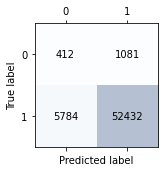

In [41]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=test_data_Y, y_pred=Y_pred_nn_down_best)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [131]:
outcome_undersample['NN']=[0.885,0.980,0.901,0.939,0.588]
outcome_undersample

,Logistic Regression,PCA+Logistic Regression,Decision tree,PCA+Decision tree,Random Forest,PCA+Random Forest,NN
Accuracy,0.933,0.870,0.955,0.913,0.439,0.434,0.885
Precision,0.979,0.980,0.979,0.980,0.990,0.990,0.980
Recall,0.952,0.885,0.975,0.931,0.428,0.424,0.901
F1,0.965,0.930,0.977,0.955,0.598,0.594,0.939
Auc,0.583,0.582,0.575,0.586,0.633,0.629,0.588


(8) Score card model
--

In [36]:
#traing model with logistic regression
from sklearn.model_selection import train_test_split
X_train, y_train = data2.iloc[:, [0,1,2,3,4,5]].values, data2.iloc[:,6].values
from imblearn.under_sampling import RandomUnderSampler
ros=RandomUnderSampler(random_state=123)
X_undersampled,y_undersampled=ros.fit_resample(X_train,y_train)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_undersampled,y_undersampled)

LogisticRegression(multi_class='ovr', random_state=1)

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score , roc_auc_score

X_test, y_test = data2.iloc[:, [0,1,2,3,4,5]].values, data2.iloc[:, 6].values
y_pred =lr.predict(X_train)
print('Accuracy: %.3f' % lr.score(X_test, y_test))

precision = precision_score(y_pred, y_test)
print('precision: %.3f' % precision)

recall = recall_score(y_pred, y_test)
print('recall: %.3f' % recall)

f1 = f1_score(y_pred, y_test)
print('F1: %.3f' % f1)

y_pred_proba = lr.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("Auc: {:.2f}".format(auc))



Accuracy: 0.485
precision: 0.476
recall: 0.991
F1: 0.643
Auc: 0.71


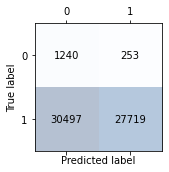

In [38]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [132]:
outcome_undersample['Score card model']=[0.485,0.476,0.991,0.643,0.71]
outcome_undersample

,Logistic Regression,PCA+Logistic Regression,Decision tree,PCA+Decision tree,Random Forest,PCA+Random Forest,NN,Score card model
Accuracy,0.933,0.870,0.955,0.913,0.439,0.434,0.885,0.485
Precision,0.979,0.980,0.979,0.980,0.990,0.990,0.980,0.476
Recall,0.952,0.885,0.975,0.931,0.428,0.424,0.901,0.991
F1,0.965,0.930,0.977,0.955,0.598,0.594,0.939,0.643
Auc,0.583,0.582,0.575,0.586,0.633,0.629,0.588,0.710


# (9) Cloglog model

In [138]:
import statsmodels.api as sm
ros=RandomUnderSampler(random_state=123)
X_downsampled,Y_downsampled=ros.fit_resample(train_data_X,train_data_Y)    
model = sm.GLM(Y_downsampled, sm.add_constant(X_downsampled), family=sm.families.Binomial(link=sm.families.links.cloglog()))
result = model.fit()

print(result.summary())


y_pred = result.predict(sm.add_constant(test_data_X))
y_pred = [1 if val > 0.5 else 0 for val in y_pred]

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  event   No. Observations:                12064
Model:                            GLM   Df Residuals:                    12055
Model Family:                Binomial   Df Model:                            8
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7805.6
Date:                Sun, 30 Apr 2023   Deviance:                       15611.
Time:                        20:00:51   Pearson chi2:                 1.20e+04
No. Iterations:                     9   Pseudo R-squ. (CS):            0.08814
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8683      0.209     -8.947      0.0

In [140]:
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print('precision: %.3f' % precision)

recall = recall_score(y_test, y_pred)
print('recall: %.3f' % recall)

f1 = f1_score(y_test, y_pred)
print('F1: %.3f' % f1)



Accuracy: 0.8332747157045002
precision: 0.979
recall: 0.847
F1: 0.908


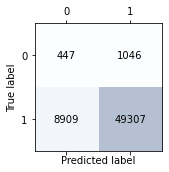

In [88]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [134]:
outcome_undersample['Cloglog model']=[0.833,0.979,0.847,0.908,None]
outcome_undersample

,Logistic Regression,PCA+Logistic Regression,Decision tree,PCA+Decision tree,Random Forest,PCA+Random Forest,NN,Score card model,Cloglog model
Accuracy,0.933,0.870,0.955,0.913,0.439,0.434,0.885,0.485,0.833
Precision,0.979,0.980,0.979,0.980,0.990,0.990,0.980,0.476,0.979
Recall,0.952,0.885,0.975,0.931,0.428,0.424,0.901,0.991,0.847
F1,0.965,0.930,0.977,0.955,0.598,0.594,0.939,0.643,0.908
Auc,0.583,0.582,0.575,0.586,0.633,0.629,0.588,0.710,NaN


# Section 3: Results display

## 3.1 Model results with oversampling

In [136]:
outcome_oversample.name = 'Model results with oversampling'
outcome_oversample

,Logistic Regression,PCA + Logistic Regression,Decision Tree,PCA+Decision Tree,Random Forest,PCA+Random Forest,NN,Score card model,Cloglog model
Accuracy,0.930,0.885,0.563,0.562,0.567,0.565,0.849,0.499,0.833
Precision,0.979,0.980,0.983,0.982,0.982,0.982,0.979,0.490,0.979
Recall,0.948,0.900,0.562,0.561,0.566,0.564,0.863,0.990,0.847
F1,0.964,0.938,0.715,0.714,0.718,0.717,0.917,0.656,0.908
Auc,0.586,0.589,0.587,0.583,0.586,0.585,0.578,0.710,NaN


## 3.2 Model results with undersampling

In [137]:
outcome_undersample.name = 'Model results with undersampling'
outcome_undersample

,Logistic Regression,PCA+Logistic Regression,Decision tree,PCA+Decision tree,Random Forest,PCA+Random Forest,NN,Score card model,Cloglog model
Accuracy,0.933,0.870,0.955,0.913,0.439,0.434,0.885,0.485,0.833
Precision,0.979,0.980,0.979,0.980,0.990,0.990,0.980,0.476,0.979
Recall,0.952,0.885,0.975,0.931,0.428,0.424,0.901,0.991,0.847
F1,0.965,0.930,0.977,0.955,0.598,0.594,0.939,0.643,0.908
Auc,0.583,0.582,0.575,0.586,0.633,0.629,0.588,0.710,NaN
